# Linear Regression vs Random Forest vs KNN Regressor

In [1]:
# basic libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error

# plotly libraries
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs , plot , iplot , init_notebook_mode
init_notebook_mode(connected = True)
cf.go_offline()

class Car:
    
    def __init__(self):
        self.car = pd.read_csv('CarPrice_Assignment.csv')
        
    def dimensions(self):
        print('total rows are : ',self.car.shape[0] , 'and' , 'total columns are : ',self.car.shape[1])
        
    def null_values(self):
        return self.car.isnull().sum()
        
    def dtype_of_columns(self):
        for cols in self.car.columns:
            if self.car[cols].dtype == 'object':
                print(cols)
                
    def fuel_type(self):
        fueltype = {}
        for i in self.car['fueltype']:
            if i not in fueltype:
                fueltype[i] = 1
            else:
                fueltype[i] += 1
                
        for key , value in fueltype.items():
            print('{:<20} {:<20}'.format(key , value))
            
    def aspiration(self):
        aspiration = {}
        for i in self.car['aspiration']:
            if i not in aspiration:
                aspiration[i] = 1
            else:
                aspiration[i] += 1
                
        for key , value in aspiration.items():
            print('{:<20} {:<20}'.format(key , value))
            
    def door(self):
        door_number = {}
        for i in self.car['doornumber']:
            if i not in door_number:
                door_number[i] = 1
            else:
                door_number[i] += 1
                
        for key , value in door_number.items():
            print('{:<20} {:<20}'.format(key,value))
            
    def cylinder(self):
        cylinder_system = {}
        for i in self.car['cylindernumber']:
            if i not in cylinder_system:
                cylinder_system[i] = 1
            else:
                cylinder_system[i] += 1
                
        for key , value in cylinder_system.items():
            print('{:<20} {:<20}'.format(key,value))
            
    def delete_unwanted(self):
        self.car = self.car.drop(['car_ID','symboling','CarName'] , axis = 1)
            
    def display(self):
        return self.car
    
c = Car()
c.dimensions()

print()

total_nulls = c.null_values()
print(total_nulls)

print()

print('Categorical features are')
c.dtype_of_columns()


print()

print('Fuel Type of the cars')
c.fuel_type()

print()

print('Aspiration of the car')
c.aspiration()

print()

print('most car have door type of')
c.door()

print()

print('Cylinder system of the cars')
c.cylinder()
c.delete_unwanted()
car_dataset = c.display()

total rows are :  205 and total columns are :  26

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Categorical features are
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem

Fuel Type of the cars
gas                  185                 
diesel               20                  

Aspiration of the car
std                  168                 
turbo                37                  

most car have

# Data Analysis and Visualization using Plotly

In [2]:
class EDA:
    
    def __init__(self):
        self.objects = [cols for cols in car_dataset.columns if car_dataset[cols].dtypes == 'object' and cols != 'doornumber']
        self.integers = [cols for cols in car_dataset.columns if car_dataset[cols].dtypes == 'int64' or car_dataset[cols].dtypes == 'float64'
                            and cols != 'price']
    def categorical_counts(self,data,y):
        for columns in self.objects:
            fig = px.bar(data , x = columns , y = y , facet_col = 'doornumber' , color = columns , title = columns)
            fig.show()
            
    def numerical_features(self,data,y):
        for columns in self.integers:
            fig = px.scatter(data , x = columns , y = y , color = 'doornumber',title = columns)
            fig.show()
            
    def create_dummies(self,dataset):
        self.dummies = pd.get_dummies(dataset[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
                                      'enginetype','cylindernumber','fuelsystem']] , drop_first = True)
    def merge_data(self,dataset):
        self.create_dummies(car_dataset)
        self.merge_car_data = pd.concat([dataset,self.dummies],axis = 1)
        return self.merge_car_data
    
    def drop_unwanted(self):
        self.merge_data(car_dataset)
        return self.merge_car_data.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
                                      'enginetype','cylindernumber','fuelsystem'],axis = 1)
            
e = EDA()
e.categorical_counts(car_dataset,'price')
e.numerical_features(car_dataset,'price')
final_car_data = e.drop_unwanted()

# Feature Selection using SelectkBest and Correlation

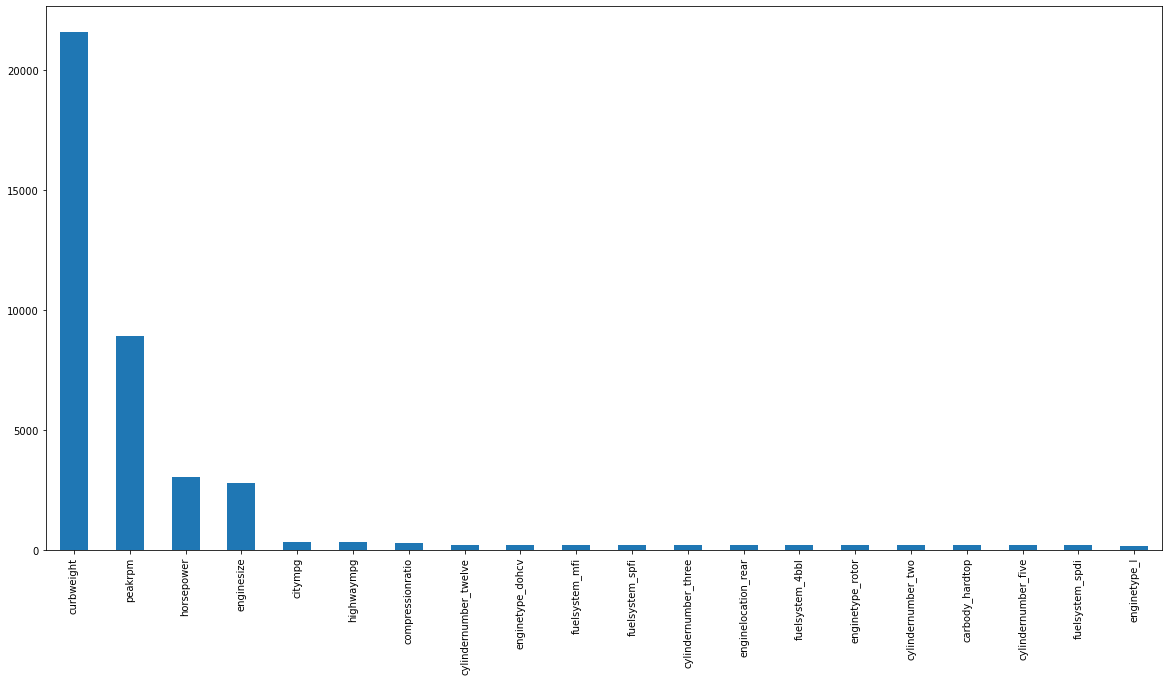

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'drivewheel_rwd', 'fuelsystem_mpfi']


In [3]:
x = final_car_data.drop('price',axis = 1)    
y = final_car_data['price'].astype('int')

class Feature_selection:
    
    def select_features(self):
        self.selector = SelectKBest(score_func=chi2 , k = 20)
        self.selector.fit(x,y)
        return self.selector.scores_
    
    def display_scores(self):
        self.select_features()
        self.score = pd.Series(self.selector.scores_,x.columns)
        return self.score
    
    def plot_scores(self):
        plt.figure(figsize=(20,10))
        self.display_scores()
        self.score.nlargest(20).plot(kind = 'bar',rot = 90)
        plt.show()
        
    def correlation(self):
        correlation_lst = final_car_data.corr()['price'][final_car_data.corr()['price'] >= 0.50].drop('price').index.tolist()
        return correlation_lst
        
        
        

f = Feature_selection()
f.plot_scores()
correlation = f.correlation()
print(correlation)

In [8]:
# selectiong features based on correlation greater than 50
x_new = final_car_data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'drivewheel_rwd', 'fuelsystem_mpfi']]
train_x , test_x , train_y , test_y = train_test_split(x_new , y , test_size = 0.3 , random_state = 42)
lin_model = LinearRegression()
neighbor_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()
class Build_Model:
    
    def fit_linear_model(self,model):
        model.fit(train_x , train_y)
        self.lin_model_predict = model.predict(test_x)
        
    def linear_score(self):
        self.fit_linear_model(lin_model)
        r2score_lin = r2_score(test_y , self.lin_model_predict)
        return r2score_lin
    
    def forest_model(self,model):
        model.fit(train_x , train_y)
        self.rfr_model_predict = model.predict(test_x)
    
         
    def forest_score(self):
        self.forest_model(rfr_model)
        r2score_forest = r2_score(test_y , self.rfr_model_predict)
        return r2score_forest
    
    def k_neighbors(self,model):
        model.fit(train_x,train_y)
        self.predict_neighbors = model.predict(test_x)
        
    def k_neighbors_score(self):
        self.k_neighbors(neighbor_model)
        r2score_neighbors = r2_score(test_y , self.predict_neighbors)
        return r2score_neighbors
    
m = Build_Model()
print('Result for Linear Regression')
score = m.linear_score()
print('total Variation explained = ',score)        
print()
print('Result for Random Forest')
forest_score = m.forest_score()
print('total variation explained',forest_score)
print()
print('Result for KNN')
neighbor_score = m.k_neighbors_score()
print('total variation explained ',neighbor_score)

Result for Linear Regression
total Variation explained =  0.7864024973250319

Result for Random Forest
total variation explained 0.939697573041972

Result for KNN
total variation explained  0.7420412499518303
